In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
import pathlib
import cv2
from tensorflow.keras import layers
from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import csv
import numpy as np
import pandas as pd
import os
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
#Link to the dataset on kaggle
https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri

In [3]:
data_train = r'C:\Users\Jordan\Desktop\jupyter notebook\ANN\BrainTumor\Training'
data_test = r'C:\Users\Jordan\Desktop\jupyter notebook\ANN\BrainTumor\Testing'

path_train = pathlib.Path(data_train)
path_test = pathlib.Path(data_test)

print(path_train)
image_count_train = len(list(path_train.glob('*/*.jpg')))
print(image_count_train)

print(path_test)
image_count_test = len(list(path_test.glob('*/*.jpg')))
print(image_count_test)

C:\Users\Jordan\Desktop\jupyter notebook\ANN\BrainTumor\Training
2870
C:\Users\Jordan\Desktop\jupyter notebook\ANN\BrainTumor\Testing
394


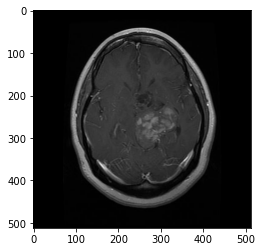

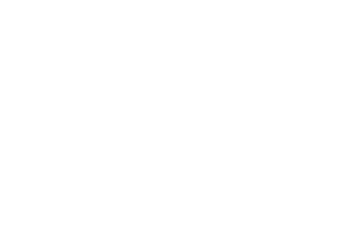

In [4]:
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category in CATEGORIES:
    path_tr = os.path.join(path_train,category)
    for img in os.listdir(path_tr):
        img_array_tr = cv2.imread(os.path.join(path_tr,img))
        plt.imshow(img_array_tr)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 127.5, 127.5, -0.5)

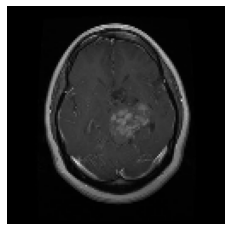

In [5]:
img_size = 128
array1 = cv2.resize(img_array_tr,(img_size, img_size))
plt.imshow(array1, cmap ="gray")
plt.axis("off")

In [6]:
train_tumor = []

for i in CATEGORIES:
    train_path = os.path.join(data_train,i)
    tag = CATEGORIES.index(i)
    for img in os.listdir(train_path):
        try:
            image_arr = cv2.imread(os.path.join(train_path , img), cv2.IMREAD_GRAYSCALE)
            new_image_array = cv2.resize(image_arr, (img_size,img_size))
            train_tumor.append([new_image_array , tag])
        except Exception as e:
            pass

In [7]:
X_train = []
y_train = []
for i,j in train_tumor:
    X_train.append(i)
    y_train.append(j)
X_train = np.array(X_train).reshape(-1,img_size,img_size)
print(X_train.shape)
X_train = X_train/255.0
X_train = X_train.reshape(-1,128,128,1)
#Converts all train images to 128x128 (128 pixels)

(2870, 128, 128)


In [8]:
# convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 4)

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (2296, 128, 128, 1)
x_test shape (574, 128, 128, 1)
y_train shape (2296, 4)
y_test shape (574, 4)


In [15]:
model = Sequential()
#
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',
activation ='relu', input_shape = (150,150,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same',
activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same',
activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 10
batch_size = 40
datagen = ImageDataGenerator(
featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=0,
zoom_range = 0,
width_shift_range=0,
height_shift_range=0,
horizontal_flip=True,
vertical_flip=False)

In [16]:
datagen.fit(X_train)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size)

C:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
57/57 [==============================] - 41s 700ms/step - loss: 1.3747 - accuracy: 0.3400 - val_loss: 1.1646 - val_accuracy: 0.4878
Epoch 2/10
57/57 [==============================] - 40s 707ms/step - loss: 1.0756 - accuracy: 0.5175 - val_loss: 0.9411 - val_accuracy: 0.5732
Epoch 3/10
57/57 [==============================] - 39s 687ms/step - loss: 0.8779 - accuracy: 0.6147 - val_loss: 0.7769 - val_accuracy: 0.6185
Epoch 4/10
57/57 [==============================] - 39s 692ms/step - loss: 0.7694 - accuracy: 0.6659 - val_loss: 0.7602 - val_accuracy: 0.6446
Epoch 5/10
57/57 [==============================] - 39s 690ms/step - loss: 0.6730 - accuracy: 0.7227 - val_loss: 0.6484 - val_accuracy: 0.7056
Epoch 6/10
57/57 [==============================] - 38s 665ms/step - loss: 0.6440 - accuracy: 0.7271 - val_loss: 0.8176 - val_accuracy: 0.6376
Epoch 7/10
57/57 [==============================] - 39s 678ms/step - loss: 0.5937 - accuracy: 0.7619 - val_loss: 0.5865 - val_accuracy: 0.7125

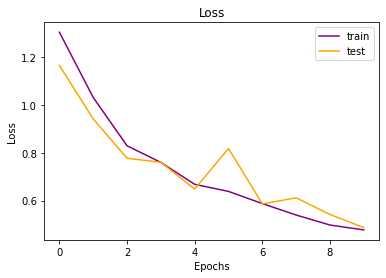

In [17]:
plt.plot(history.history["loss"],c = "purple")
plt.plot(history.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

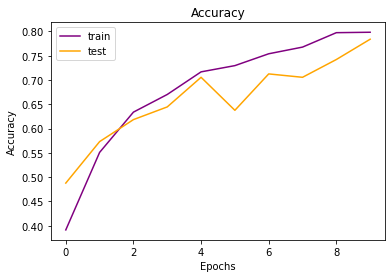

In [18]:
plt.plot(history.history["accuracy"],c = "purple")
plt.plot(history.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()